<a href="https://colab.research.google.com/github/supriyaohdar/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Failure Prediction

Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [ ]:
#from google.colab import files
#uploaded=files.upload()

Read the Dataset

In [ ]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#Exploratory Data Analysis and Data Preprocessing

In [ ]:
df.shape

(299, 13)

It has 299 rows and 13 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


only float and integer datatype and no misiing values

In [ ]:
df.describe(include="all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Here mean value is less than median for all the columns.

In [ ]:
skew=df.skew()
skew

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

Values closer to zero shows less skew

Data Visualization

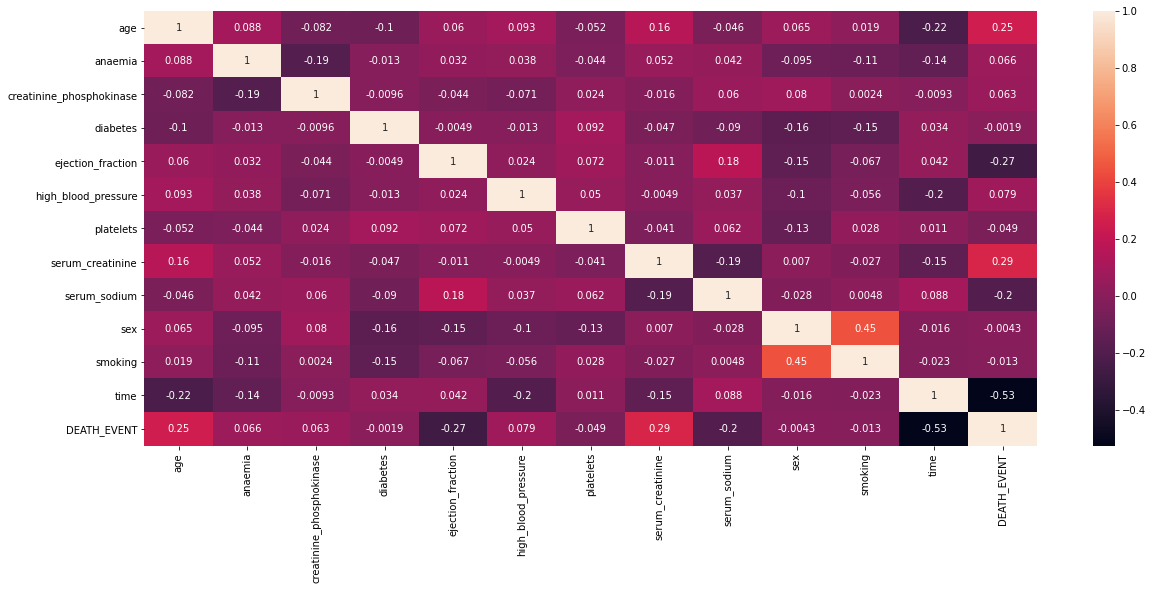

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

There is a strong positive correlation between age, serum creatine and death event rates. In addition, we can observe that death rates increase with the increase in serum creatine and age.

Sex and smoking rates show a positive correlation between themselves. This rate shows that the number of smokers is higher in men than in women.

[]

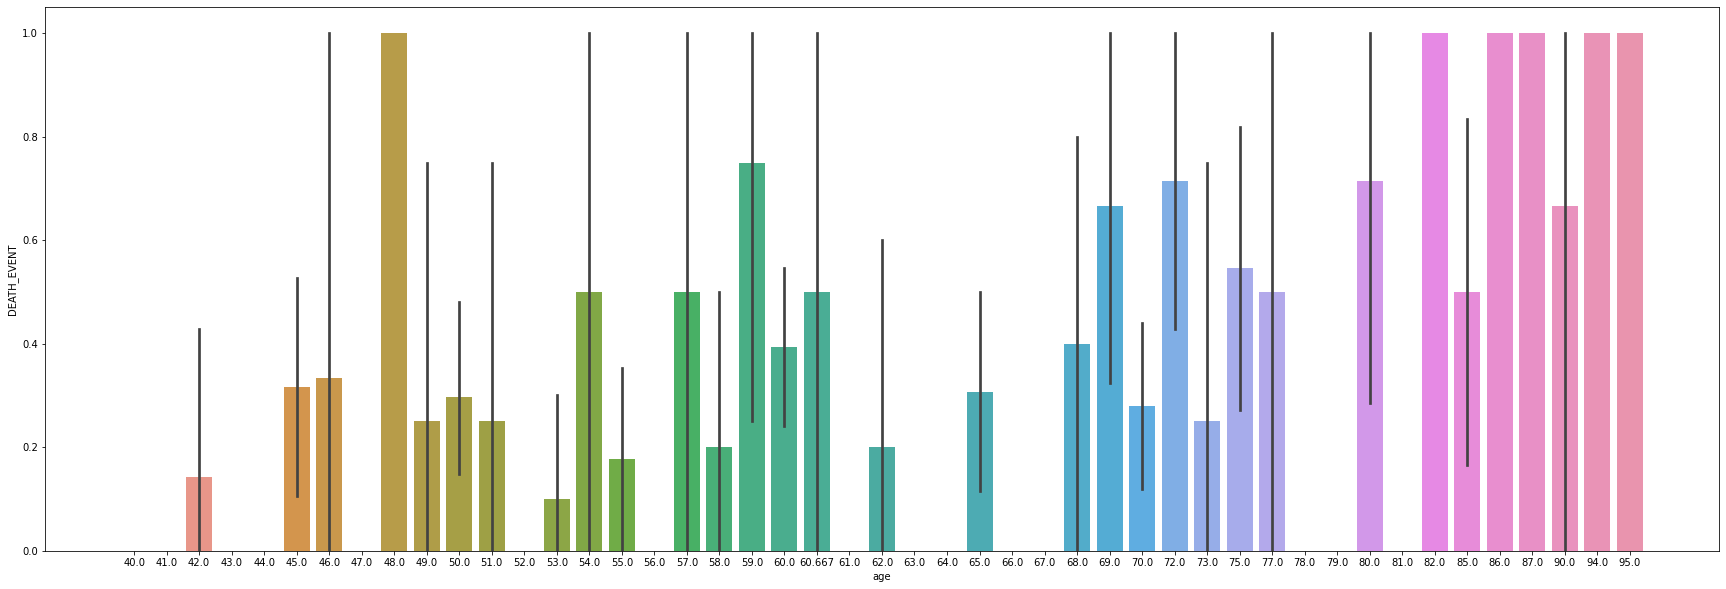

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x=df['age'], y=df['DEATH_EVENT'])
plt.plot()

The death rate is more for age above 80.

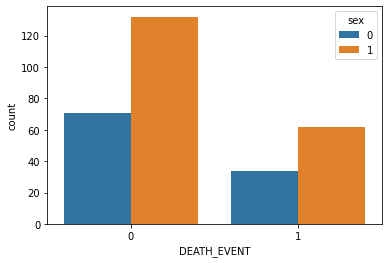

In [ ]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=df)

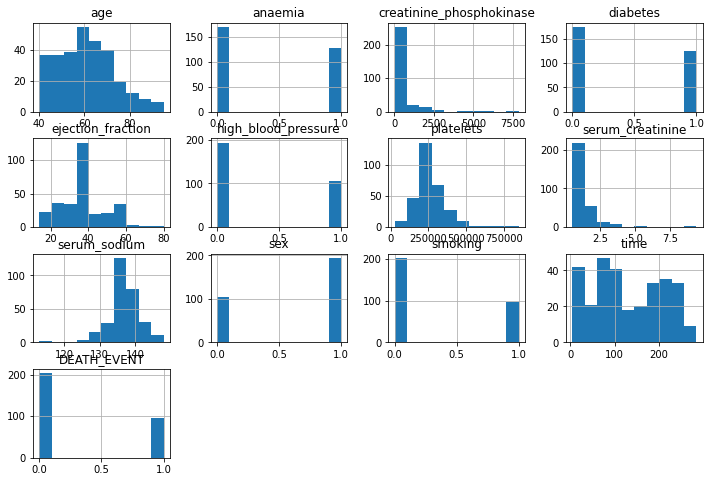

In [ ]:
df.hist(figsize=(12,8))
plt.show()

#Feature Engineering

Splitting the Dataset

In [ ]:
array = data.values
X = array[:, 0:13]
Y = array[:, 12]



Standardize data

In [ ]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

#set_printoptions(precision=3)
#print(rescaledX[0:5,:])

#Feature Selection

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(rescaledX, Y)

set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(rescaledX)

print(features[0:5,:])

[4.895e-04 1.146e-05 5.687e-03 1.675e-07 8.635e-05 5.156e-06 3.556e-09
 1.262e-04 1.542e-04 9.614e-09 1.494e-06 1.445e-02 9.659e-04]
[[2.830e-04 0.000e+00 2.196e-03 7.547e-05 3.774e-06 7.170e-06 4.906e-04
  0.000e+00 1.509e-05 3.774e-06]
 [2.087e-04 0.000e+00 2.984e-02 1.442e-04 0.000e+00 4.175e-06 5.162e-04
  0.000e+00 2.277e-05 3.795e-06]
 [4.012e-04 0.000e+00 9.012e-04 1.235e-04 0.000e+00 8.025e-06 7.963e-04
  6.173e-06 4.321e-05 6.173e-06]
 [2.381e-04 4.762e-06 5.286e-04 9.524e-05 0.000e+00 9.048e-06 6.524e-04
  0.000e+00 3.333e-05 4.762e-06]
 [1.988e-04 3.058e-06 4.893e-04 6.116e-05 0.000e+00 8.257e-06 3.547e-04
  0.000e+00 2.446e-05 3.058e-06]]


The chi-squared (chi2) statistical test for non-negative features to select 4 of the best features from  dataset.

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(features, Y, test_size=0.20, random_state=1)

#Data Modelling

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(x_valid)

In [ ]:
score = model.score(x_valid, y_valid)
score

0.7666666666666667

In [ ]:
acc = model.score(x_valid, y_valid)
acc*100

76.66666666666667

In [ ]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_valid, predictions))

0.23333333333333334


K-Fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(model, x_train, y_train, scoring=scoring, cv=kfold)
msg = '%f (%f)'%(cv_results.mean(), cv_results.std())
print(msg)

0.657246 (0.081770)
